In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_1500_transposta = pd.read_csv('./results_1500_paralelo_transposta.csv')
df_1500 = pd.read_csv('./results_1500_paralelo.csv')
df_1000_transposta = pd.read_csv('./results_1000_paralelo_transposta.csv')
df_1000 = pd.read_csv('./results_1000_paralelo.csv')
df_400_transposta = pd.read_csv('./results_400_paralelo_transposta.csv')
df_400 = pd.read_csv('./results_400_paralelo.csv')
df_1500_transposta.head()

,num_threads,run,real_time
0,1,1,9.14
1,1,2,10.12
2,1,3,10.78
3,1,4,10.77
4,1,5,10.68


In [4]:
df_1500.head()



,num_threads,run,real_time
0,1,1,16.82
1,1,2,16.45
2,1,3,16.82
3,1,4,15.10
4,1,5,15.50


In [5]:
# Compute grouped statistics
grouped_1500_transposta = df_1500_transposta.groupby('num_threads')['real_time'].agg(['mean', 'std']).reset_index()
grouped_1500_transposta

grouped_1500 = df_1500.groupby('num_threads')['real_time'].agg(['mean', 'std']).reset_index()


grouped_1000_transposta = df_1000_transposta.groupby('num_threads')['real_time'].agg(['mean', 'std']).reset_index()
grouped_1000_transposta

grouped_1000 = df_1000.groupby('num_threads')['real_time'].agg(['mean', 'std']).reset_index()



grouped_400_transposta = df_400_transposta.groupby('num_threads')['real_time'].agg(['mean', 'std']).reset_index()
grouped_400_transposta

grouped_400 = df_400.groupby('num_threads')['real_time'].agg(['mean', 'std']).reset_index()

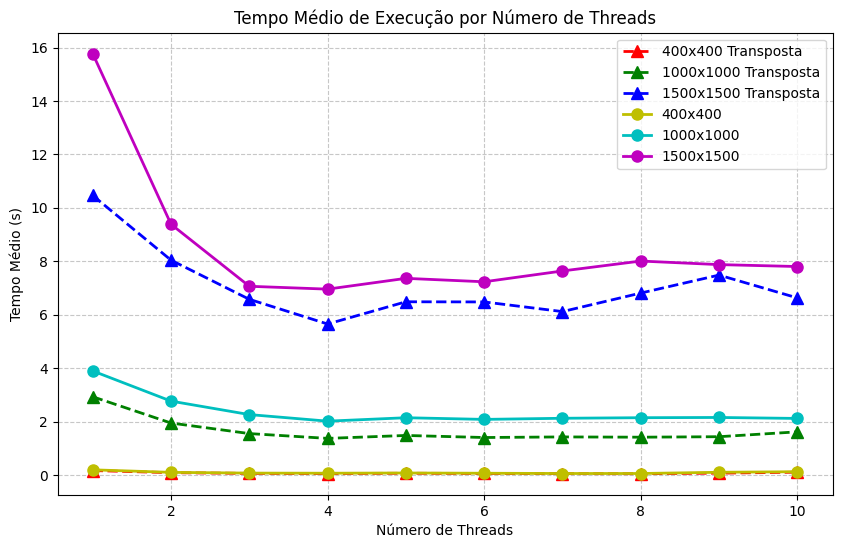

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_400_transposta['num_threads'], grouped_400_transposta['mean'], 'r--', linewidth=2, markersize=8, marker='^', label='400x400 Transposta')
plt.plot(grouped_1000_transposta['num_threads'], grouped_1000_transposta['mean'], 'g--', linewidth=2, markersize=8, marker='^', label='1000x1000 Transposta')
plt.plot(grouped_1500_transposta['num_threads'], grouped_1500_transposta['mean'], 'b--', linewidth=2, markersize=8, marker='^', label='1500x1500 Transposta')
plt.plot(grouped_400['num_threads'], grouped_400['mean'], 'yo-', linewidth=2, markersize=8, label='400x400')
plt.plot(grouped_1000['num_threads'], grouped_1000['mean'], 'co-', linewidth=2, markersize=8, label='1000x1000')
plt.plot(grouped_1500['num_threads'], grouped_1500['mean'], 'mo-', linewidth=2, markersize=8, label='1500x1500')
plt.legend()
plt.xlabel('Número de Threads')
plt.ylabel('Tempo Médio (s)')
plt.title('Tempo Médio de Execução por Número de Threads')
plt.grid(True, linestyle='--', alpha=0.7)


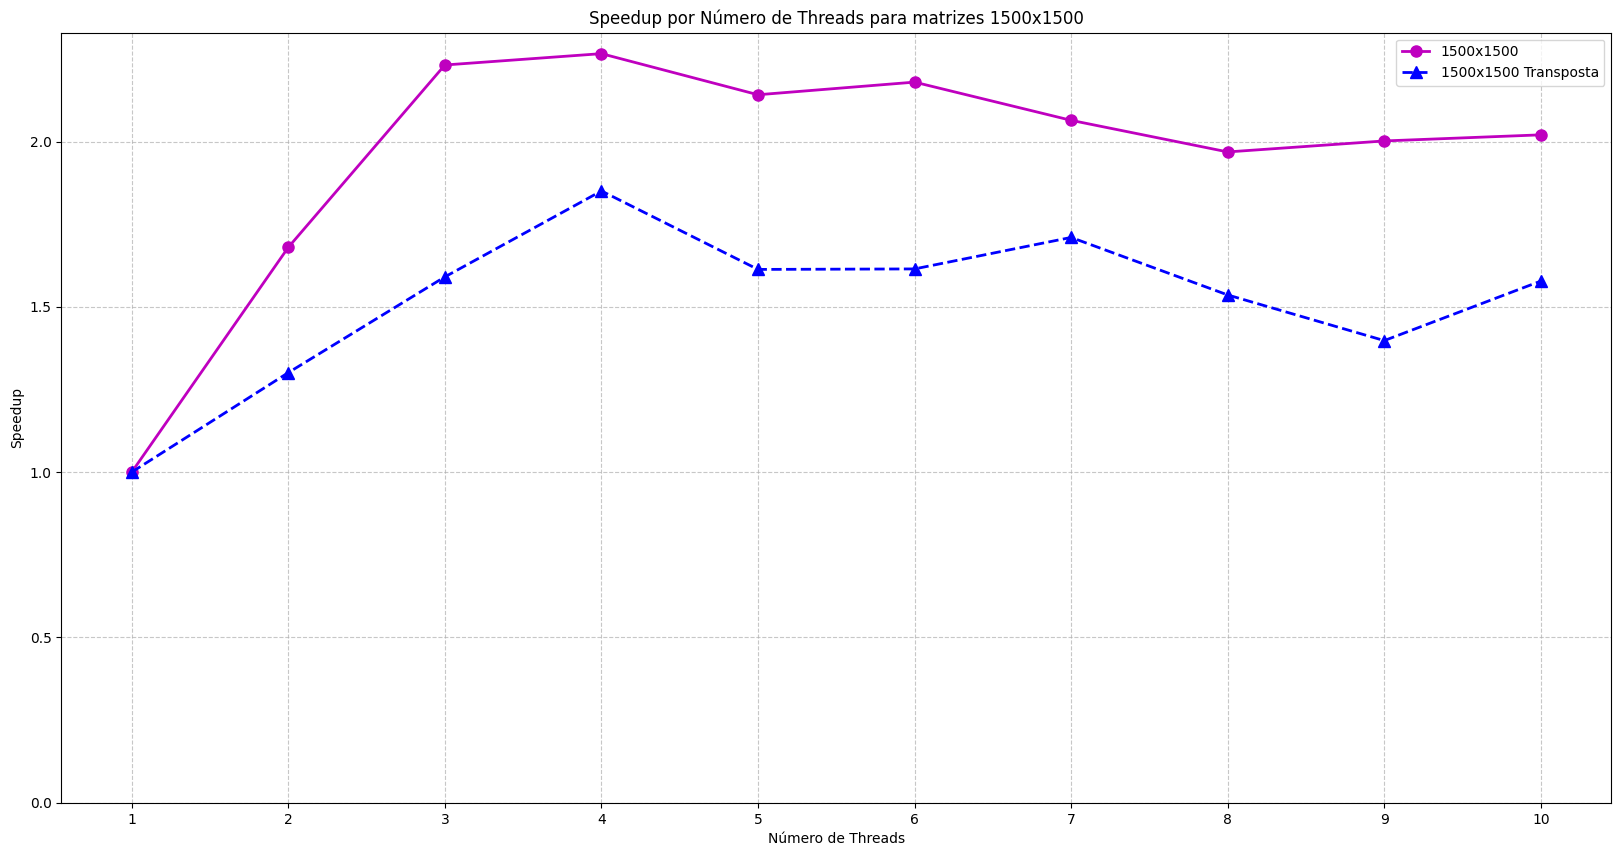

In [7]:
## now compute the speedup 

# Calculate speedup for each matrix size
speedup_400_transposta = grouped_400_transposta['mean'].iloc[0] / grouped_400_transposta['mean']
speedup_1000_transposta = grouped_1000_transposta['mean'].iloc[0] / grouped_1000_transposta['mean']
speedup_1500_transposta = grouped_1500_transposta['mean'].iloc[0] / grouped_1500_transposta['mean']
speedup_400 = grouped_400['mean'].iloc[0] / grouped_400['mean']
speedup_1000 = grouped_1000['mean'].iloc[0] / grouped_1000['mean']
speedup_1500 = grouped_1500['mean'].iloc[0] / grouped_1500['mean']

# Create speedup dataframe
speedup_df = pd.DataFrame({
    'num_threads': grouped_400_transposta['num_threads'],
    '400x400': speedup_400,
    '1000x1000': speedup_1000,
    '1500x1500': speedup_1500,
    '400x400_transposta': speedup_400_transposta,
    '1000x1000_transposta': speedup_1000_transposta,
    '1500x1500_transposta': speedup_1500_transposta
})

# and plot the speedup

plt.figure(figsize=(20, 10))
plt.plot(speedup_df['num_threads'], speedup_df['1500x1500'], 'mo-', linewidth=2, markersize=8, label='1500x1500')
plt.plot(speedup_df['num_threads'], speedup_df['1500x1500_transposta'], 'b--', marker='^', linewidth=2, markersize=8, label='1500x1500 Transposta')
plt.legend()
plt.xlabel('Número de Threads')
plt.ylabel('Speedup')
plt.title('Speedup por Número de Threads para matrizes 1500x1500')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(speedup_df['num_threads'])
plt.ylim(bottom=0)  # Faz o eixo y começar em zero
plt.show()





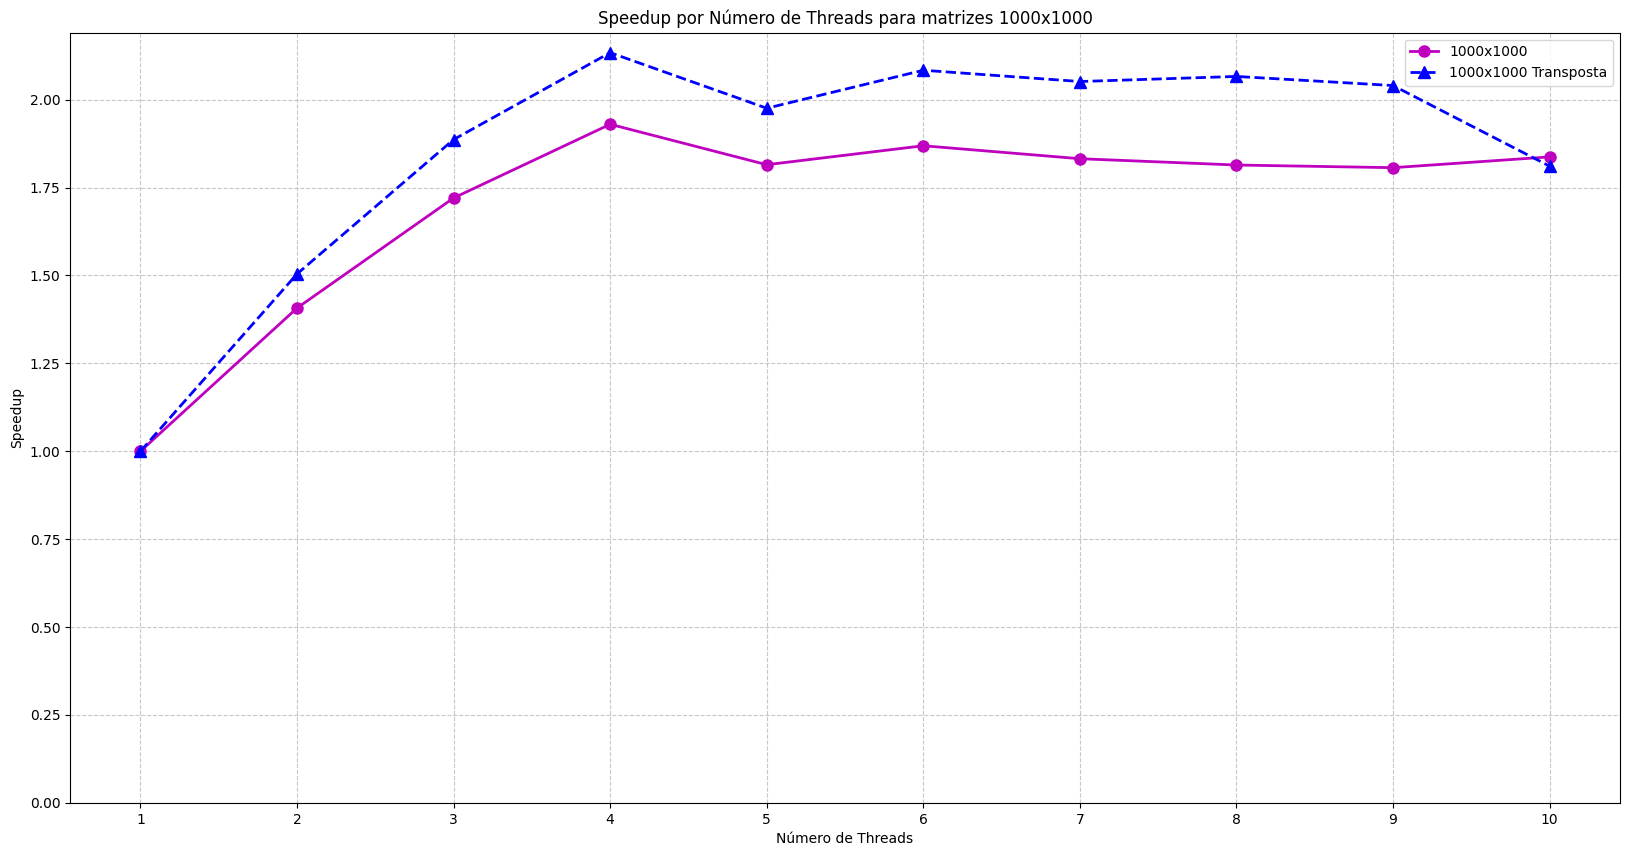

In [8]:
## for 1000x1000

plt.figure(figsize=(20, 10))
plt.plot(speedup_df['num_threads'], speedup_df['1000x1000'], 'mo-', linewidth=2, markersize=8, label='1000x1000')
plt.plot(speedup_df['num_threads'], speedup_df['1000x1000_transposta'], 'b--', marker='^', linewidth=2, markersize=8, label='1000x1000 Transposta')
plt.legend()
plt.xlabel('Número de Threads')
plt.ylabel('Speedup')
plt.title('Speedup por Número de Threads para matrizes 1000x1000')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(speedup_df['num_threads'])
plt.ylim(bottom=0)  # Faz o eixo y começar em zero
plt.show()


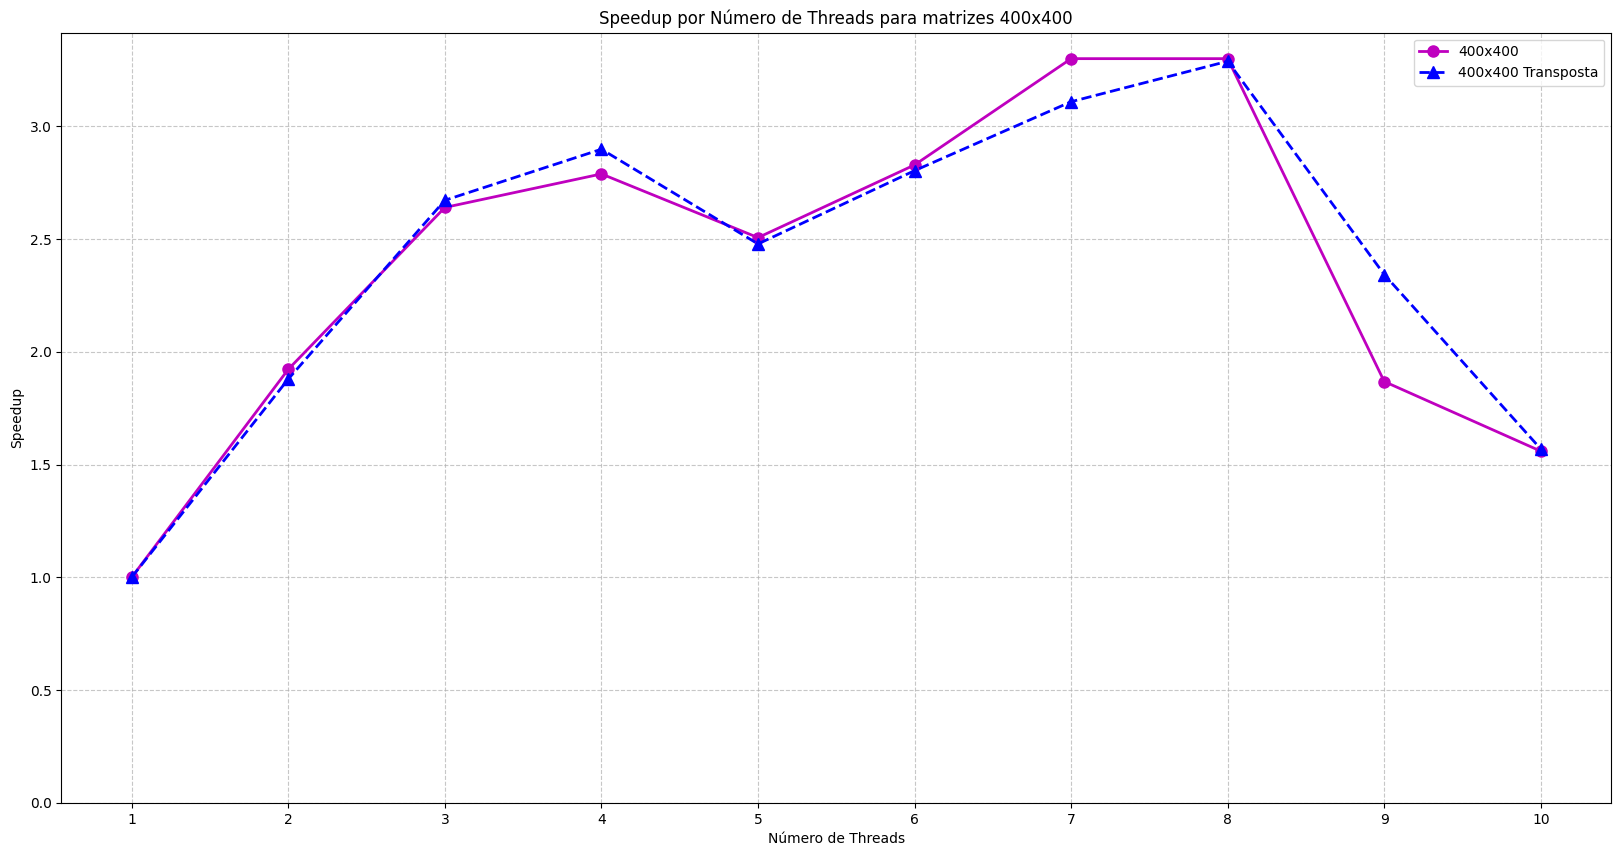

In [9]:
# for 400x400

plt.figure(figsize=(20, 10))
plt.plot(speedup_df['num_threads'], speedup_df['400x400'], 'mo-', linewidth=2, markersize=8, label='400x400')
plt.plot(speedup_df['num_threads'], speedup_df['400x400_transposta'], 'b--', marker='^', linewidth=2, markersize=8, label='400x400 Transposta')
plt.legend()
plt.xlabel('Número de Threads') 
plt.ylabel('Speedup')
plt.title('Speedup por Número de Threads para matrizes 400x400')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(speedup_df['num_threads'])
plt.ylim(bottom=0)  # Faz o eixo y começar em zero
plt.show()


In [13]:
# Criar um resumo lado a lado com a média para cada método por número de threads
summary_df = pd.DataFrame()

# Calcular médias para cada tamanho de matriz e método
df_400.groupby('num_threads')['real_time'].mean()

# Calcular médias de speedup para cada tamanho de matriz e método
summary_df = pd.DataFrame()

# Para matrizes 400x400
summary_df['400x400'] = df_400.groupby('num_threads')['real_time'].mean()
summary_df['400x400_transposta'] = df_400_transposta.groupby('num_threads')['real_time'].mean()

# Para matrizes 1000x1000
summary_df['1000x1000'] = df_1000.groupby('num_threads')['real_time'].mean()
summary_df['1000x1000_transposta'] = df_1000_transposta.groupby('num_threads')['real_time'].mean()

# Para matrizes 1500x1500
summary_df['1500x1500'] = df_1500.groupby('num_threads')['real_time'].mean()
summary_df['1500x1500_transposta'] = df_1500_transposta.groupby('num_threads')['real_time'].mean()

# Calcular speedup (dividir pelo tempo com 1 thread)
for col in summary_df.columns:
    base_time = summary_df[col].iloc[0]  # Tempo com 1 thread
    summary_df[f'{col}_speedup'] = base_time / summary_df[col]

# Exibir resultados
print("\nMédias de Speedup:")
print(summary_df.filter(like='_speedup'))



Médias de Speedup:
             400x400_speedup  400x400_transposta_speedup  1000x1000_speedup  \
num_threads                                                                   
1                       1.00                        1.00               1.00   
2                       1.92                        1.88               1.41   
3                       2.64                        2.67               1.72   
4                       2.79                        2.90               1.93   
5                       2.51                        2.48               1.82   
6                       2.83                        2.80               1.87   
7                       3.30                        3.11               1.83   
8                       3.30                        3.29               1.81   
9                       1.87                        2.34               1.81   
10                      1.56                        1.57               1.84   

             1000x1000_transpos